In [ ]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# 1. Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 1. Load dataset yang berisi hasil ekstraksi
input_csv = "/content/drive/MyDrive/Hasil_Ekstraksi_Telur_Normalized.csv"
df = pd.read_csv(input_csv)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters for GLCM: {'C': 1000, 'gamma': 'auto', 'kernel': 'rbf'}
Akurasi GLCM: 0.9094650205761317
Laporan Klasifikasi GLCM:
                     precision    recall  f1-score   support

       Berkualitas       0.97      0.94      0.96       175
Kurang Berkualitas       0.86      0.88      0.87       163
 Tidak Berkualitas       0.90      0.90      0.90       148

          accuracy                           0.91       486
         macro avg       0.91      0.91      0.91       486
      weighted avg       0.91      0.91      0.91       486



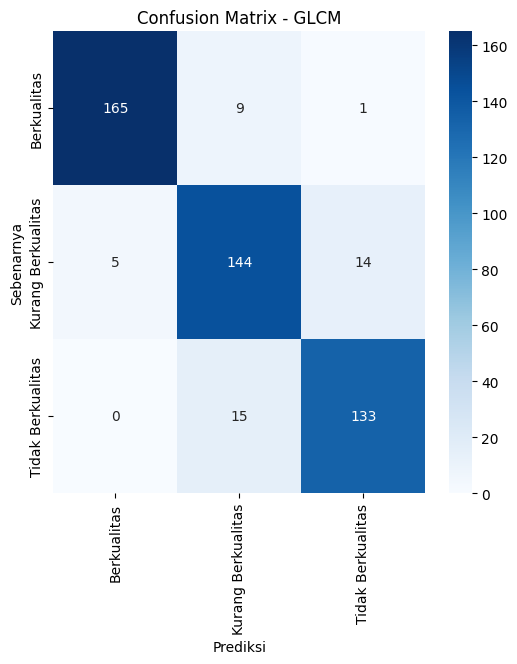

In [ ]:
# 2. Pisahkan fitur dan label untuk GLCM
glcm_columns = [
    'kontras_glcm', 'korelasi_glcm', 'energi_glcm', 'homogenitas_glcm', 'entropi_glcm',
    'variance_glcm', 'skewness_glcm', 'std_dev_glcm', 'mean_glcm'
]

X_glcm = df[glcm_columns]  # Fitur GLCM
y = df['kelas_kualitas']   # Label (kelas kualitas)

# 3. Membagi data menjadi data latih dan data uji (80%-20%)
X_train_glcm, X_test_glcm, y_train, y_test = train_test_split(X_glcm, y, test_size=0.2, random_state=42)

# 4. Standarisasi fitur
scaler = StandardScaler()
X_train_glcm_scaled = scaler.fit_transform(X_train_glcm)
X_test_glcm_scaled = scaler.transform(X_test_glcm)

# 5. Definisikan parameter grid untuk GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],        # Regularization parameter
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1],  # Kernel coefficient
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']  # Coba lebih banyak kernel
}

# 6. GridSearchCV untuk GLCM
svm_model_glcm = svm.SVC(decision_function_shape='ovr', random_state=42)
grid_search_glcm = GridSearchCV(svm_model_glcm, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search_glcm.fit(X_train_glcm_scaled, y_train)

print(f"Best parameters for GLCM: {grid_search_glcm.best_params_}")

# 7. Gunakan model terbaik untuk prediksi
best_model_glcm = grid_search_glcm.best_estimator_
y_pred_glcm = best_model_glcm.predict(X_test_glcm_scaled)

# 8. Evaluasi hasil klasifikasi
accuracy_glcm = accuracy_score(y_test, y_pred_glcm)
report_glcm = classification_report(y_test, y_pred_glcm)
conf_matrix_glcm = confusion_matrix(y_test, y_pred_glcm)

print(f"Akurasi GLCM: {accuracy_glcm}")
print("Laporan Klasifikasi GLCM:\n", report_glcm)

# 9. Plot Confusion Matrix untuk GLCM
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix_glcm, annot=True, fmt="d", cmap="Blues", xticklabels=['Berkualitas', 'Kurang Berkualitas', 'Tidak Berkualitas'], yticklabels=['Berkualitas', 'Kurang Berkualitas', 'Tidak Berkualitas'])
plt.xlabel('Prediksi')
plt.ylabel('Sebenarnya')
plt.title('Confusion Matrix - GLCM')
plt.show()

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters for LBP: {'C': 1000, 'gamma': 'auto', 'kernel': 'rbf'}
Akurasi LBP: 0.7407407407407407
Laporan Klasifikasi LBP:
                     precision    recall  f1-score   support

       Berkualitas       0.85      0.82      0.84       175
Kurang Berkualitas       0.71      0.61      0.66       163
 Tidak Berkualitas       0.66      0.79      0.72       148

          accuracy                           0.74       486
         macro avg       0.74      0.74      0.74       486
      weighted avg       0.75      0.74      0.74       486



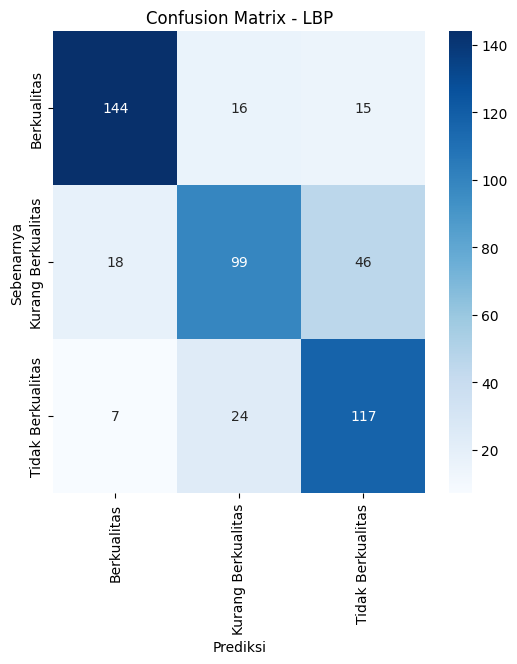

In [ ]:
# 10. Klasifikasi LBP

# Pisahkan fitur dan label untuk LBP
lbp_columns = [
    'mean_lbp', 'std_dev_lbp', 'energi_lbp', 'entropi_lbp', 'variance_lbp',
    'skewness_lbp', 'kontras_lbp', 'korelasi_lbp', 'homogenitas_lbp'
]

X_lbp = df[lbp_columns]  # Fitur LBP

# Membagi data menjadi data latih dan data uji (80%-20%)
X_train_lbp, X_test_lbp, y_train, y_test = train_test_split(X_lbp, y, test_size=0.2, random_state=42)

# Standarisasi fitur
X_train_lbp_scaled = scaler.fit_transform(X_train_lbp)
X_test_lbp_scaled = scaler.transform(X_test_lbp)

# GridSearchCV untuk LBP
svm_model_lbp = svm.SVC(decision_function_shape='ovr', random_state=42)
grid_search_lbp = GridSearchCV(svm_model_lbp, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search_lbp.fit(X_train_lbp_scaled, y_train)

print(f"Best parameters for LBP: {grid_search_lbp.best_params_}")

# Gunakan model terbaik untuk prediksi
best_model_lbp = grid_search_lbp.best_estimator_
y_pred_lbp = best_model_lbp.predict(X_test_lbp_scaled)

# Evaluasi hasil klasifikasi
accuracy_lbp = accuracy_score(y_test, y_pred_lbp)
report_lbp = classification_report(y_test, y_pred_lbp)
conf_matrix_lbp = confusion_matrix(y_test, y_pred_lbp)

print(f"Akurasi LBP: {accuracy_lbp}")
print("Laporan Klasifikasi LBP:\n", report_lbp)

# Plot Confusion Matrix untuk LBP
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix_lbp, annot=True, fmt="d", cmap="Blues", xticklabels=['Berkualitas', 'Kurang Berkualitas', 'Tidak Berkualitas'], yticklabels=['Berkualitas', 'Kurang Berkualitas', 'Tidak Berkualitas'])
plt.xlabel('Prediksi')
plt.ylabel('Sebenarnya')
plt.title('Confusion Matrix - LBP')
plt.show()